In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [5]:
df = pd.read_csv('train.csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [9]:
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [21]:
df.dropna(inplace=True)
df.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


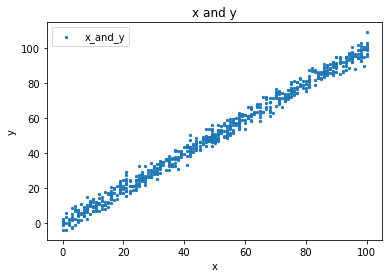

In [17]:
plt.scatter(df['x'],df['y'], label = 'x_and_y', s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x and y')
plt.legend()

## Blatantly linear relationship...let's make a model for it

In [38]:
model = LinearRegression()
model = model.fit(df['x'].values.reshape(-1,1), df['y'])

#finding the formula for the line
slope = float(model.coef_)
intercept = model.intercept_
line = "y = {} + {}x".format(intercept, slope)
print "The regression line is", line

The regression line is y = -0.107265464301 + 1.00065638186x


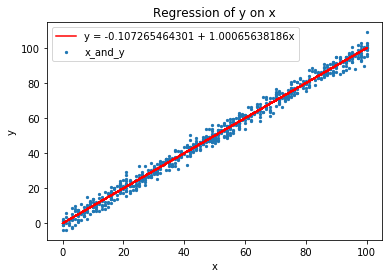

In [43]:
x = df['x']
y = (intercept + slope*x)

plt.scatter(df['x'],df['y'], s=5, label='x_and_y')
plt.plot(x,y, color='r', label = line)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression of y on x')

plt.legend()

## We have a model, now let's test it using the testing data

In [46]:
test = pd.read_csv('test.csv')
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [50]:
y_true = test['y']
y_pred = model.predict(test['x'].values.reshape(-1,1))

r2 = r2_score(y_true, y_pred)
print "R-squared score is", r2

R-squared score is 0.988801444433


### The R-squared score is very nearly one, meaning it accounts for almost 100% of the variability in the data

### Next lets find the Mean Squared Error (MSE)

In [52]:
mse = mean_squared_error(y_true, y_pred)
print "MSE is", mse

MSE is 9.43292219204


### Fairly close to zero